$\mu_A$ = A -> {0, 1}

In [4]:
from matplotlib import pyplot as plt

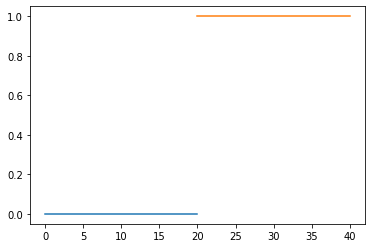

In [5]:
plt.plot([0, 20], [0, 0])
plt.plot([20, 40], [1,1])

$\mu_A$ = A -> [0, 1]

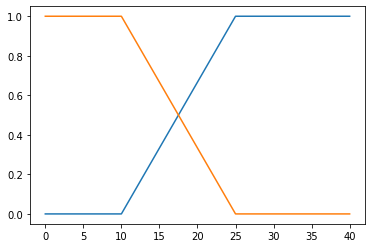

In [13]:
plt.plot([0, 10, 25, 40], [0, 0, 1, 1])
plt.plot([0,10,25,40],[1,1,0,0])

$\mu_{A \cup B}$ = $\mu_A \vee \mu_B$

$\mu_{A \cap B}$ = $\mu_A \wedge \mu_B$

$\mu_{A^C}$ = ~$\mu_A$

$\mu_{A \cup B}$ = max{$\mu_A$, $\mu_B$}

$\mu_{A \cup B}$ = min{$\mu_A$, $\mu_B$}

$\mu_{A^C}$ = 1 - $\mu_A$

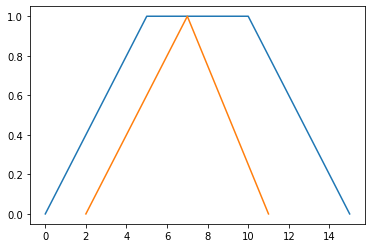

In [17]:
plt.plot([0, 5, 10, 15], [0, 1, 1, 0])
plt.plot([2,7,11],[0,1,0])
# plt.plot([3,3], [0,1])

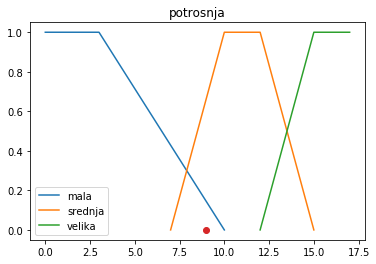

In [26]:
plt.plot([0, 3, 10], [1, 1, 0])
plt.plot([7, 10, 12,15],[0,1,1,0])
plt.plot([12,15,17],[0,1,1])
plt.title('potrosnja')
plt.legend(['mala', 'srednja', 'velika'])
plt.plot([9],[0],'o')

$\mu_{mala}(9)$ = (10 - 9) / (10 - 3) = 0.14

$\mu_{srednja}(9) = (9 - 7) / (10 - 7) = 0.67$

$\mu_{velika}(9)$ = 0

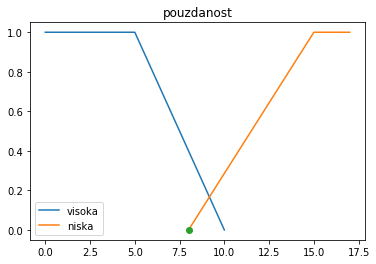

In [29]:
plt.plot([0,5,10],[1,1,0])
plt.plot([8,15,17],[0,1,1])
plt.title('pouzdanost')
plt.legend(['visoka', 'niska'])
plt.plot([8],[0], 'o')

$\mu_{visoka}(8)$ = (10 - 8) / (10 - 5) = 0.4

$\mu_{niska}(8)$ = 0

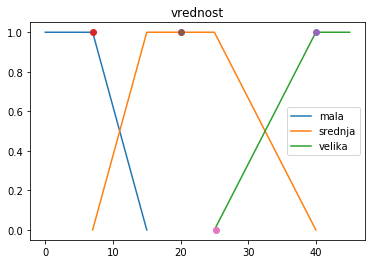

In [40]:
plt.plot([0, 7, 15], [1, 1, 0])
plt.plot([7,15,25,40], [0,1,1,0])
plt.plot([25,40,45], [0,1,1])
plt.title('vrednost')
plt.legend(['mala', 'srednja', 'velika'])
plt.plot([7],[1],'o')
plt.plot([40],[1],'o')
plt.plot([(15 + 25) / 2], [1], 'o')
plt.plot([25.26], [0], 'o')

1. $\mu_{malaPotrosnja} \wedge \mu_{visokaPouzdanost} => \mu_{velikaVrednost}$
2. $\mu_{malaPotrosnja} \wedge \mu_{niskaPouzdanost} => \mu_{srednjaVrednost}$
3. $\mu_{srednjaPotrosnja} \wedge \mu_{visokaPouzdanost} => \mu_{srednjaVrednost}$
4. $\mu_{srednjaPotrosnja} \wedge \mu_{niskaPouzdanost} => \mu_{srednjaVrednost}$
5. $\mu_{velikaPotrosnja} \wedge \mu_{visokaPouzdanost} => \mu_{srednjaVrednost}$
6. $\mu_{velikaPotrosnja} \wedge \mu_{niskaPouzdanost} => \mu_{malaVrednost}$

1. $\mu_{velikaVrednost} = min(\mu_{malaPotrosnja}, \mu_{visokaPouzdanost})$
2. $\mu_{srednjaVrednost} = min(\mu_{malaPotrosnja}, \mu_{niskaPouzdanost})$
3. $\mu_{srednjaVrednost} = min(\mu_{srednjaPotrosnja}, \mu_{visokaPouzdanost})$
4. $\mu_{srednjaVrednost} = min(\mu_{srednjaPotrosnja}, \mu_{niskaPouzdanost})$
5. $\mu_{velikaVrednost} = min(\mu_{velikaPotrosnja}, \mu_{visokaPouzdanost})$
6. $\mu_{malaVrednost} = min(\mu_{velikaPotrosnja}, \mu_{niskaPouzdanost})$

$\mu_{velikaVrednost} = min(0.14, 0.4) = 0.14$

$\mu_{srednjaVrednost} = max(0, 0.4, 0, 0) = 0.4 $

$\mu_{malaVrednost} = min(0, 0) = 0$

$\frac{\mu(mala) * c(mala) + \mu(srednja) * c(srednja) + \mu(velika) * c(velika)}{\mu(mala) + \mu(srednja) + \mu(velika)} = \frac{0 * 7 + 0.4 * 20 + 0.14 * 40}{0 + 0.4 + 0.14} = 25.26$

In [42]:
list(zip([1,2], [3,4]))

[(1, 3), (2, 4)]

In [45]:
class FuzzyInput():
    
    def __init__(self, name, xs, ys, x0):
        self.name = name
        self.points = list(zip(xs, ys))
        self.mu = self.calcMu(x0)
        
    def calcMu(self, x0):
        if x0 < self.points[0][0]:
            return self.points[0][1]
        if x0 > self.points[-1][0]:
            return self.points[-1][1]
        for i in range(0, len(self.points) - 1):
            x1 = self.points[i][0]
            x2 = self.points[i + 1][0]
            if x0 >= x1 and x0 < x2:
                y1 = self.points[i][1]
                y2 = self.points[i + 1][1]
                if y1 == y2:
                    return y2
                if y1 < y2:
                    return (x0 - x1) / (x2 - x1)
                return (x2 - x0) / (x2 - x1)

In [46]:
fi = FuzzyInput('mala', [3,10], [1,0], 9)
fi.mu

0.14285714285714285

In [47]:
class FuzzyOutput():
    
    def __init__(self, name, xs, ys):
        self.name = name
        self.points = list(zip(xs, ys))
        self.mu = 0
        avg = 0
        n = 0
        for p in self.points:
            if p[1] == 1:
                avg += p[0]
                n += 1
        self.c = avg / n

In [52]:
fo = FuzzyOutput('askjk', [1,15,25,40],[0,1,1,0])
fo.c

20.0

In [53]:
from enum import Enum, unique

@unique
class LogicOp(Enum):
    AND = 0
    OR = 1

class Rule():
    
    def __init__(self, input1, input2, output, operator):
        self.input1 = input1
        self.input2 = input2
        self.output = output
        if operator == LogicOp.AND:
            self.output.mu = max(self.output.mu, min(self.input1.mu, self.input2.mu))
        else:
            self.output.mu = max(self.output.mu, max(self.input1.mu, self.input2.mu))

In [54]:
potrosnja = []
potrosnja.append(FuzzyInput('mala', [3,10],[1,0], 9))
potrosnja.append(FuzzyInput('srednja', [7,10,12,15],[0,1,1,0], 9))
potrosnja.append(FuzzyInput('velika', [12,15],[0,1], 9))

pouzdanost = []
pouzdanost.append(FuzzyInput('visoka', [5,10],[1,0], 8))
pouzdanost.append(FuzzyInput('niska', [8,15],[0,1], 8))

vrednost = []
vrednost.append(FuzzyOutput('mala', [7,15],[1,0]))
vrednost.append(FuzzyOutput('srednja', [7,15, 25,40],[0,1,1,0]))
vrednost.append(FuzzyOutput('velika', [25,40],[0,1]))

rules = []
rules.append(Rule(potrosnja[0], pouzdanost[0], vrednost[2], LogicOp.AND))
rules.append(Rule(potrosnja[0], pouzdanost[1], vrednost[1], LogicOp.AND))
rules.append(Rule(potrosnja[1], pouzdanost[0], vrednost[1], LogicOp.AND))
rules.append(Rule(potrosnja[1], pouzdanost[1], vrednost[1], LogicOp.AND))
rules.append(Rule(potrosnja[2], pouzdanost[0], vrednost[1], LogicOp.AND))
rules.append(Rule(potrosnja[2], pouzdanost[1], vrednost[0], LogicOp.AND))

In [55]:
gore = 0
dole = 0
for v in vrednost:
    gore += v.mu * v.c
    dole += v.mu
gore/dole

25.26315789473684